In [4]:
%cd '/content/drive/MyDrive/intern'

/content/drive/MyDrive/intern


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from tensorflow.keras.initializers import TruncatedNormal

In [44]:
#データセットの読み込み
Data=pd.read_csv('SpotifyFeatures.csv')

In [45]:
Data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [46]:
Data.dtypes

genre                object
artist_name          object
track_name           object
track_id             object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
dtype: object

# ジャンルの分類
出力カテゴリであるジャンルの分類を行う

## ジャンルの取り除き
'Movie', 'Comedy', 'Children’s Music', 'Electronic', 'Soundtrack', 'A Capella'のジャンルの取り除きを行った。
'Movie', 'Comedy'は今回の趣旨とは外れるため、その他の項目は後で示す大きなジャンルへの分類が難しかったため取り除いた。

In [47]:
Data=Data[Data["genre"] != 'Movie']#動画なので今回の目的とは外れる
Data=Data[Data['genre']!='Comedy']#お笑いの音声なので今回の目的とは外れる

#以下分類が難しかったもの
Data=Data[Data["genre"]!="Children's Music"]
Data=Data[Data['genre']!='Children’s Music']
Data=Data[Data['genre']!='Electronic']
Data=Data[Data['genre']!='Soundtrack']
Data=Data[Data['genre']!='A Capella']

In [48]:
#取り除いた結果
Data['genre'].unique()

array(['R&B', 'Alternative', 'Country', 'Dance', 'Anime', 'Folk', 'Blues',
       'Opera', 'Hip-Hop', 'Rap', 'Indie', 'Classical', 'Pop', 'Reggae',
       'Reggaeton', 'Jazz', 'Rock', 'Ska', 'Soul', 'World'], dtype=object)

## ジャンルのまとめ
6つのジャンルにまとめる

In [49]:
#ポップス
Data['genre'][Data['genre']=='Rap']='Pop'
Data['genre'][Data['genre']=='Hip-Hop']='Pop'
Data['genre'][Data['genre']=='Anime']='Pop'
Data['genre'][Data['genre']=='Dance']='Pop'
Data['genre'][Data['genre']=='R&B']='Pop'

C:\Users\admin\AppData\Local\Temp\ipykernel_7956\3152498058.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['genre'][Data['genre']=='Hip-Hop']='Pop'
C:\Users\admin\AppData\Local\Temp\ipykernel_7956\3152498058.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['genre'][Data['genre']=='Anime']='Pop'
C:\Users\admin\AppData\Local\Temp\ipykernel_7956\3152498058.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['genre']

In [50]:
#クラシック
Data['genre'][Data['genre']=='Opera']='Classical'

C:\Users\admin\AppData\Local\Temp\ipykernel_7956\3671457315.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['genre'][Data['genre']=='Opera']='Classical'


In [51]:
#ジャズ
Data['genre'][Data['genre']=='Ska']='Jazz'

C:\Users\admin\AppData\Local\Temp\ipykernel_7956\2112620202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['genre'][Data['genre']=='Ska']='Jazz'


In [52]:
# ロック
Data['genre'][Data['genre']=='R&B']='Rock'
Data['genre'][Data['genre']=='Blues']='Rock'
Data['genre'][Data['genre']=='Alternative']='Rock'

C:\Users\admin\AppData\Local\Temp\ipykernel_7956\1125174977.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['genre'][Data['genre']=='R&B']='Rock'
C:\Users\admin\AppData\Local\Temp\ipykernel_7956\1125174977.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['genre'][Data['genre']=='Blues']='Rock'
C:\Users\admin\AppData\Local\Temp\ipykernel_7956\1125174977.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['genre'][D

In [53]:
#カントリー
Data['genre'][Data['genre']=='Indie']='Country'
Data['genre'][Data['genre']=='World']='Country'
Data['genre'][Data['genre']=='Folk']='Country'
Data['genre'][Data['genre']=='Soul']='Country'
Data['genre'][Data['genre']=='Reggae']='Country'
Data['genre'][Data['genre']=='Reggaeton']='Country'

C:\Users\admin\AppData\Local\Temp\ipykernel_7956\252769233.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['genre'][Data['genre']=='Indie']='Country'
C:\Users\admin\AppData\Local\Temp\ipykernel_7956\252769233.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['genre'][Data['genre']=='World']='Country'
C:\Users\admin\AppData\Local\Temp\ipykernel_7956\252769233.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['genr

In [54]:
Data['genre'].unique()

array(['Pop', 'Rock', 'Country', 'Classical', 'Jazz'], dtype=object)

In [55]:
Data['genre'].value_counts()

Country      63389
Pop          54542
Rock         27558
Jazz         18315
Classical    17536
Name: genre, dtype: int64

# 特徴量の処理
## 'time_signature'の項目を分ける
ワンホットエンコーディングを行い、0/4,3/4,4/4,5/4に分ける

In [56]:
Data=pd.get_dummies(Data, columns=['time_signature'])

## 正規化、標準化

<AxesSubplot:>

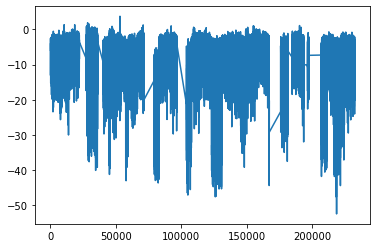

In [57]:
Data['loudness'].plot()

In [58]:
#正規化
def min_max(l):
    return (l-l.min())/(l.max()-l.min())

l=np.log(Data['duration_ms'])#データの幅が大きいため対数を取る
Data['duration_ms']=min_max(Data['duration_ms'])
Data['loudness']=min_max(Data['loudness'])
Data['tempo']=min_max(Data['tempo'])

<AxesSubplot:>

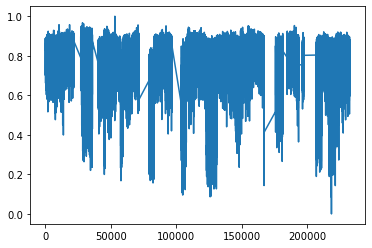

In [59]:
Data['loudness'].plot()

<AxesSubplot:>

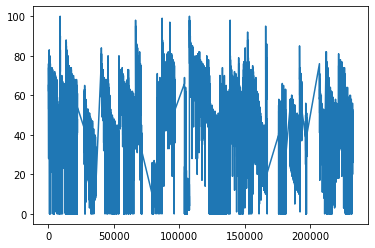

In [60]:
Data['popularity'].plot()

<AxesSubplot:>

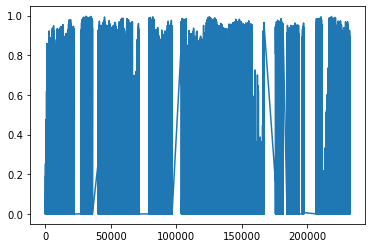

In [61]:
Data['instrumentalness'].plot()

In [20]:
#標準化
def standardization(l):
    return (l-l.mean())/l.std()

Data['popularity']=standardization(Data['popularity'])
Data['instrumentalness']=standardization(Data['instrumentalness'])

## 文字データを数値へ変換

In [21]:
le=LabelEncoder()
le.fit(Data['mode'].fillna('NA'))
Data['mode']=le.transform(Data['mode'].fillna('NA'))
le.fit(Data['key'].fillna('NA'))
Data['key']=le.transform(Data['key'].fillna('NA'))

In [22]:
le.fit(Data['genre'].fillna('NA'))
Data['genre']=le.transform(Data['genre'].fillna('NA'))
genre_array=le.classes_#'genre'を数値変換したものをgenreに保存しておく

In [23]:
genre_array

array(['Classical', 'Country', 'Jazz', 'Pop', 'Rock'], dtype=object)

# 特徴量の選択
## 相互情報量の取得

In [ ]:
X=Data[['popularity','acousticness','danceability','duration_ms','energy','instrumentalness','key','liveness','loudness','mode','speechiness','tempo','time_signature_0/4','time_signature_3/4','time_signature_4/4','time_signature_5/4','valence']]

from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold()
sel.fit_transform(X)

X_new = pd.DataFrame(sel.fit_transform(X), columns=X.columns.values[sel.get_support()])

from sklearn.feature_selection import SelectKBest, mutual_info_classif

selector = SelectKBest(mutual_info_classif, k=7)
X_new2 = pd.DataFrame(selector.fit_transform(X_new, Data['genre']), columns=X_new.columns.values[selector.get_support()])
result = pd.DataFrame(selector.get_support(), index=X_new.columns.values, columns=['False: dropped'])
result['score'] = selector.scores_
result['pvalue'] = selector.pvalues_

print(result)

KeyboardInterrupt: ignored

In [24]:
X=Data[['popularity','danceability','energy','acousticness','instrumentalness','speechiness','loudness']]

相互情報量をもとに、dropedがTrueのものだけ扱う

In [25]:
X.head()

,popularity,danceability,energy,acousticness,instrumentalness,speechiness,loudness
135,1.237358,0.724,0.689,0.0830,-0.433980,0.1350,0.828010
136,1.117272,0.685,0.610,0.3230,-0.433980,0.0439,0.840483
137,1.057230,0.762,0.520,0.0675,-0.433966,0.0959,0.840199
138,0.997187,0.563,0.366,0.3600,-0.425042,0.1210,0.810680
139,1.417486,0.653,0.621,0.5960,-0.433980,0.0409,0.831587


In [26]:
y=Data[['genre']]

# 学習データとテストデータの分割

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

# ニューラルネットワークの実装

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import Adam

In [29]:
model=Sequential()
model.add(Dense(256,activation='relu',input_shape=(len(X.columns),),kernel_initializer=TruncatedNormal(stddev=0.01)))
model.add(Dropout(0.5))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y['genre'].max()+1,activation='softmax'))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 1

In [31]:
opt = Adam(lr = 0.0005)

In [32]:
model.compile(
  loss = 'sparse_categorical_crossentropy',
  optimizer = opt,
  metrics=["accuracy"],
)

In [33]:
model.load_weights('./checkpoints/checkpoint')

# 学習

In [ ]:
history = model.fit(
    X_train, y_train, 
    batch_size=1000, 
    epochs=400
    )

Epoch 1/400
127/127 [==============================] - 2s 13ms/step - loss: 1.2311 - accuracy: 0.4947
Epoch 2/400
127/127 [==============================] - 2s 13ms/step - loss: 1.0720 - accuracy: 0.5689
Epoch 3/400
127/127 [==============================] - 2s 14ms/step - loss: 1.0429 - accuracy: 0.5806
Epoch 4/400
127/127 [==============================] - 2s 13ms/step - loss: 1.0230 - accuracy: 0.5899
Epoch 5/400
127/127 [==============================] - 2s 13ms/step - loss: 1.0087 - accuracy: 0.5966
Epoch 6/400
127/127 [==============================] - 2s 13ms/step - loss: 1.0011 - accuracy: 0.5999
Epoch 7/400
127/127 [==============================] - 2s 13ms/step - loss: 0.9944 - accuracy: 0.6018
Epoch 8/400
127/127 [==============================] - 2s 13ms/step - loss: 0.9876 - accuracy: 0.6037
Epoch 9/400
127/127 [==============================] - 2s 13ms/step - loss: 0.9844 - accuracy: 0.6048
Epoch 10/400
127/127 [==============================] - 2s 13ms/step - loss: 0.979

127/127 [==============================] - 2s 16ms/step - loss: 0.9174 - accuracy: 0.6297
Epoch 160/400
127/127 [==============================] - 2s 16ms/step - loss: 0.9178 - accuracy: 0.6302
Epoch 161/400
127/127 [==============================] - 2s 16ms/step - loss: 0.9158 - accuracy: 0.6301
Epoch 162/400
127/127 [==============================] - 2s 16ms/step - loss: 0.9174 - accuracy: 0.6306
Epoch 163/400
127/127 [==============================] - 2s 15ms/step - loss: 0.9173 - accuracy: 0.6303
Epoch 164/400
127/127 [==============================] - 2s 15ms/step - loss: 0.9166 - accuracy: 0.6312
Epoch 165/400
127/127 [==============================] - 2s 16ms/step - loss: 0.9179 - accuracy: 0.6302
Epoch 166/400
127/127 [==============================] - 2s 16ms/step - loss: 0.9168 - accuracy: 0.6315
Epoch 167/400
127/127 [==============================] - 2s 15ms/step - loss: 0.9171 - accuracy: 0.6305
Epoch 168/400
127/127 [==============================] - 2s 16ms/step - loss: 

127/127 [==============================] - 2s 15ms/step - loss: 0.9098 - accuracy: 0.6321
Epoch 315/400
127/127 [==============================] - 2s 15ms/step - loss: 0.9100 - accuracy: 0.6319 0s - loss: 0.9097 - accuracy: 0.
Epoch 316/400
127/127 [==============================] - 2s 18ms/step - loss: 0.9086 - accuracy: 0.6335 0s - loss: 0.9
Epoch 317/400
127/127 [==============================] - 2s 16ms/step - loss: 0.9104 - accuracy: 0.6331
Epoch 318/400
127/127 [==============================] - 2s 16ms/step - loss: 0.9107 - accuracy: 0.6326
Epoch 319/400
127/127 [==============================] - 2s 15ms/step - loss: 0.9097 - accuracy: 0.6324
Epoch 320/400
127/127 [==============================] - 2s 17ms/step - loss: 0.9098 - accuracy: 0.6320
Epoch 321/400
127/127 [==============================] - 2s 16ms/step - loss: 0.9085 - accuracy: 0.6328
Epoch 322/400
127/127 [==============================] - 2s 16ms/step - loss: 0.9089 - accuracy: 0.6328
Epoch 323/400
127/127 [=======

In [ ]:
model.save_weights('./checkpoints/checkpoint')

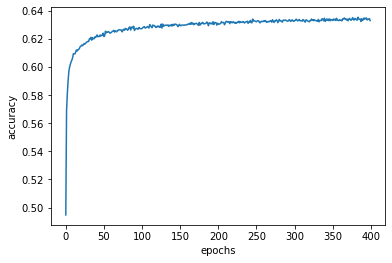

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.savefig('accuracy.png')

## テストデータの予測
テストデータを予測し、予測結果と正解を比較した

In [ ]:
pred=model.predict(X_test)
model.evaluate(X_test,y_test)

1701/1701 [==============================] - 1s 820us/step - loss: 0.9194 - accuracy: 0.6232


[0.9193919897079468, 0.623157262802124]

In [ ]:
y_test[:10]

,genre
7337,1
212820,1
112325,3
63036,1
209486,1
67754,3
149774,3
53722,4
56576,3
10178,4


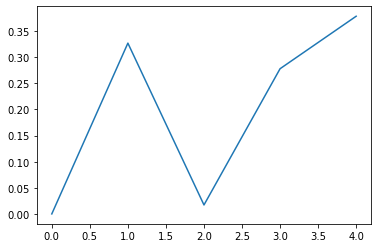

In [ ]:
plt.plot(pred[1])

このように、予測に失敗していても、次に正解の確率が高いジャンルが予測結果となっていることがわかる。

# 検証

In [35]:
model.load_weights('./checkpoints/checkpoint')

## 項目の入力

In [40]:
popularity=input('popularity(曲の人気度)[-2.6～3.4]:')
danceability=input('danceability(踊りやすさ)[0～1]:')
energy=input('energy(エネルギッシュさ)[0～1]:')
acousticness=input('acousticness(踊りやすさ)[0～1]:')
instrumentalness=input('instrumentalness(インスト感(歌声の割合)[-0.4～3.3]:')
speechiness=input('speechiness(言葉がどれくらい入っているか)[0～1]:')
loudness=input('loudness(音量・音圧)[0～1]:')

popularity(曲の人気度)[-2.6～3.4]:-2.6
danceability(踊りやすさ)[0～1]:0
energy(エネルギッシュさ)[0～1]:1
acousticness(踊りやすさ)[0～1]:1
instrumentalness(インスト感(歌声の割合)[-0.4～3.3]:3.3
speechiness(言葉がどれくらい入っているか)[0～1]:0
loudness(音量・音圧)[0～1]:0


In [41]:
test=X[0:1]
test['popularity']=popularity
test['danceability']=danceability
test['energy']=energy
test['acousticness']=acousticness
test['instrumentalness']=instrumentalness
test['speechiness']=speechiness
test['loudness']=loudness

C:\Users\admin\AppData\Local\Temp\ipykernel_7956\2509607945.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['popularity']=popularity
C:\Users\admin\AppData\Local\Temp\ipykernel_7956\2509607945.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['danceability']=danceability
C:\Users\admin\AppData\Local\Temp\ipykernel_7956\2509607945.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [42]:
pred=model.predict(test.astype("float"))

## アーティストの出力

In [43]:
import random
def choise_artist(genre, n=3):
    df = pd.read_csv('genre_artist.csv')
    target_data = df[df['genre'] == genre]
    artists = target_data['artist_name'].values.tolist()
    artist_names = random.sample(artists, 3)
    return artist_names

def example():
    genre=genre_array[np.argmax(pred)]
    print(f'genre={genre}: artists={choise_artist(genre)}')
    
example()

genre=Classical: artists=['Olivier Messiaen', 'Howard Shore', 'Giacomo Puccini']
